<a href="https://colab.research.google.com/github/Tushar060723/stackoverflow/blob/main/Stackoverflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import collections

In [ ]:
!wget  https://www.dropbox.com/s/5721wcs2guuykzl/stacksample.zip

--2025-06-24 13:06:53--  https://www.dropbox.com/s/5721wcs2guuykzl/stacksample.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/bnabda9cee2yuyi6wesmv/stacksample.zip?rlkey=sucdc1cm2m7fnwtzhykv24g8z [following]
--2025-06-24 13:06:54--  https://www.dropbox.com/scl/fi/bnabda9cee2yuyi6wesmv/stacksample.zip?rlkey=sucdc1cm2m7fnwtzhykv24g8z
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf4070067f7153cec8c1ce9c428.dl.dropboxusercontent.com/cd/0/inline/CsPjutipnImh43LfZBvn5Ee5ZXOxd202FEG2Tnvoo5S1w5ajJF0_fuxVR-4N0e-Z1AEx9KIG05HU78NGBvGk3EAuj_5qAoq-h-gzPLHUAiVbVMuSwhIVqOZ5MjPOJpWJiAk/file# [following]
--2025-06-24 13:06:54--  https://ucf4070067f7153cec8c1ce9c428.dl.dropboxusercontent.com/cd/0/inline/CsPjutipnImh4

In [ ]:
!unzip stacksample.zip

Archive:  stacksample.zip
replace Answers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Answers.csv             
  inflating: Questions.csv           
  inflating: Tags.csv                


In [ ]:
ques = pd.read_csv('Questions.csv',encoding='iso-8859-1')
ques.head(10)

,Id,OwnerUserId,CreationDate,ClosedDate,Score,Title,Body
0,80,26.0,2008-08-01T13:57:07Z,NaN,26,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,58.0,2008-08-01T14:41:24Z,2012-12-26T03:45:49Z,144,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,83.0,2008-08-01T15:50:08Z,NaN,21,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,2089740.0,2008-08-01T18:42:19Z,NaN,53,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,91.0,2008-08-01T23:22:08Z,NaN,49,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
5,330,63.0,2008-08-02T02:51:36Z,NaN,29,Should I use nested classes in this case?,<p>I am working on a collection of classes use...
6,470,71.0,2008-08-02T15:11:47Z,2016-03-26T05:23:29Z,13,Homegrown consumption of web services,<p>I've been writing a few web services for a ...
7,580,91.0,2008-08-02T23:30:59Z,NaN,21,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...
8,650,143.0,2008-08-03T11:12:52Z,NaN,79,Automatically update version number,<p>I would like the version property of my app...
9,810,233.0,2008-08-03T20:35:01Z,NaN,9,Visual Studio Setup Project - Per User Registr...,<p>I'm trying to maintain a Setup Project in <...


In [ ]:
ques.drop(["OwnerUserId","CreationDate","ClosedDate","Score"], axis=1, inplace=True)

In [ ]:
ques.head(10)

,Id,Title,Body
0,80,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,90,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,120,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,180,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,260,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
5,330,Should I use nested classes in this case?,<p>I am working on a collection of classes use...
6,470,Homegrown consumption of web services,<p>I've been writing a few web services for a ...
7,580,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...
8,650,Automatically update version number,<p>I would like the version property of my app...
9,810,Visual Studio Setup Project - Per User Registr...,<p>I'm trying to maintain a Setup Project in <...


In [ ]:
import re

def rem_html_tags(body):
    regex = re.compile('<.*?>')
    return re.sub(regex, '', body)

In [ ]:
ques['Body'] = ques['Body'].apply(rem_html_tags)
ques.head()

,Id,Title,Body
0,80,SQLStatement.execute() - multiple queries in o...,I've written a database generation script in S...
1,90,Good branching and merging tutorials for Torto...,Are there any really good tutorials explaining...
2,120,ASP.NET Site Maps,Has anyone got experience creating SQL-based A...
3,180,Function for creating color wheels,This is something I've pseudo-solved many time...
4,260,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...


In [ ]:
ques.to_csv('question_clean.csv',index=False)

In [ ]:
df_tags = pd.read_csv('Tags.csv', encoding='iso-8859-1')

In [ ]:
def plot_tags(tagCount):

    x,y = zip(*tagCount)

    colormap = plt.cm.gist_ncar #nipy_spectral, Set1,Paired
    colors = [colormap(i) for i in np.linspace(0, 0.8,50)]

    area = [i/4000 for i in list(y)]   # 0 to 15 point radiuses
    plt.figure(figsize=(9,8))
    plt.ylabel("Number of question associations")
    for i in range(len(y)):
        plt.plot(i,y[i], marker='o', linestyle='',ms=area[i],label=x[i])

    plt.legend(numpoints=1)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

[('javascript', 124155), ('java', 115212), ('c#', 101186), ('php', 98808), ('android', 90659), ('jquery', 78542), ('python', 64601), ('html', 58976), ('c++', 47591), ('ios', 47009)]


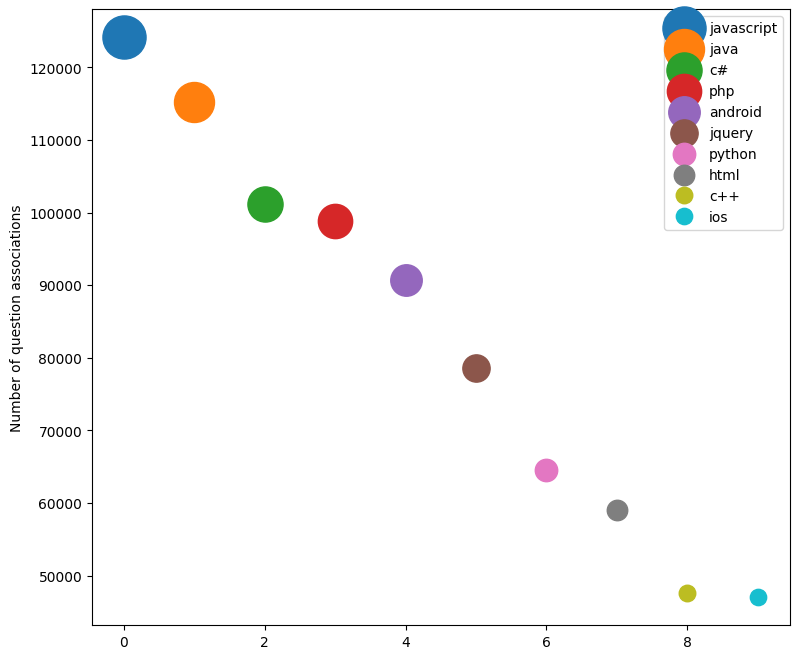

In [ ]:
tagCount =  collections.Counter(list(df_tags['Tag'])).most_common(10)
print(tagCount)
plot_tags(tagCount)

In [ ]:
top10=['javascript','java','c#','php','android','jquery','python','html','c++','ios']

In [ ]:
tag_top10= df_tags[df_tags.Tag.isin(top10)]
print (tag_top10.shape)
tag_top10.head()

(826739, 2)


,Id,Tag
14,260,c#
18,330,c++
28,650,c#
35,930,c#
39,1010,c#


In [ ]:
tag_top10['Id'].value_counts().head(10)

,count
Id,
11648170,5
23267320,5
35318730,5
30798790,5
31085960,5
23484760,5
35283570,5
30991580,5
4009250,5


In [ ]:
tag_top10.head()

,Id,Tag
14,260,c#
18,330,c++
28,650,c#
35,930,c#
39,1010,c#


In [ ]:
def add_tags(question_id):
    return tag_top10[tag_top10['Id'] == question_id['Id']].Tag.values

top10 = tag_top10.apply(add_tags, axis=1)

In [ ]:
len(top10),tag_top10.shape

(826739, (826739, 2))

In [ ]:
tag_top10=pd.concat([tag_top10, top10.rename('Tags')], axis=1)
tag_top10.head()

,Id,Tag,Tags
14,260,c#,[c#]
18,330,c++,[c++]
28,650,c#,[c#]
35,930,c#,[c#]
39,1010,c#,[c#]


In [ ]:
tag_top10.drop(["Tag"], axis=1, inplace=True)
tag_top10.shape

(826739, 2)

In [ ]:
top10_tags=tag_top10.loc[tag_top10.astype(str).drop_duplicates().index]

In [ ]:
ques = pd.read_csv('question_clean.csv', encoding='iso-8859-1')
ques.head()

,Id,Title,Body
0,80,SQLStatement.execute() - multiple queries in o...,I've written a database generation script in S...
1,90,Good branching and merging tutorials for Torto...,Are there any really good tutorials explaining...
2,120,ASP.NET Site Maps,Has anyone got experience creating SQL-based A...
3,180,Function for creating color wheels,This is something I've pseudo-solved many time...
4,260,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...


In [ ]:
total=pd.merge(ques, top10_tags, on='Id')
print(total.shape)
total.head()

(706336, 4)


,Id,Title,Body,Tags
0,260,Adding scripting functionality to .NET applica...,I have a little game written in C#. It uses a ...,[c#]
1,330,Should I use nested classes in this case?,I am working on a collection of classes used f...,[c++]
2,650,Automatically update version number,I would like the version property of my applic...,[c#]
3,930,How do I connect to a database and loop over a...,What's the simplest way to connect and query a...,[c#]
4,1010,"How to get the value of built, encoded ViewState?",I need to grab the base64-encoded representati...,[c#]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from nltk import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, BatchNormalization, GRU ,concatenate
from keras.models import Model

In [ ]:
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(total.Tags)
labels = multilabel_binarizer.classes_
labels

array(['android', 'c#', 'c++', 'html', 'ios', 'java', 'javascript',
       'jquery', 'php', 'python'], dtype=object)

In [ ]:
train,test=train_test_split(total[:550000],test_size=0.25,random_state=24)

In [ ]:
train.shape,test.shape

((412500, 4), (137500, 4))

In [ ]:
X_train_t=train['Title']
X_train_b=train['Body']
y_train=multilabel_binarizer.transform(train['Tags'])
X_test_t=test['Title']
X_test_b=test['Body']
y_test=multilabel_binarizer.transform(test['Tags'])

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
sent_lens_t=[]
for sent in train['Title']:
    sent_lens_t.append(len(word_tokenize(sent)))
max(sent_lens_t)

60

In [ ]:
np.quantile(sent_lens_t,0.97)

np.float64(18.0)

In [ ]:
max_len_t = 18
tok = Tokenizer(char_level=False,split=' ')
tok.fit_on_texts(X_train_t)
sequences_train_t = tok.texts_to_sequences(X_train_t)

In [ ]:
vocab_len_t=len(tok.index_word.keys())
vocab_len_t


68969

In [ ]:
sequences_matrix_train_t = sequence.pad_sequences(sequences_train_t,maxlen=max_len_t)
sequences_matrix_train_t

array([[    0,     0,     0, ...,     1,   957,   197],
       [    0,     0,     0, ...,  9081,    45,   533],
       [    0,     0,     0, ...,   147,     8,   230],
       ...,
       [    0,     0,     0, ...,    10,    71,  2985],
       [    0,     0,     0, ...,     2,    18,    75],
       [    0,     0,     0, ..., 11009,   809,   267]], dtype=int32)

In [ ]:
sequences_test_t = tok.texts_to_sequences(X_test_t)
sequences_matrix_test_t = sequence.pad_sequences(sequences_test_t,maxlen=max_len_t)

In [ ]:
sequences_matrix_train_t.shape,sequences_matrix_test_t.shape,y_train.shape,y_test.shape

((412500, 18), (137500, 18), (412500, 10), (137500, 10))

In [ ]:
sent_lens_b=[]
for sent in train['Body']:
    sent_lens_b.append(len(word_tokenize(sent)))
max(sent_lens_b)

20868

In [ ]:
np.quantile(sent_lens_b,0.90)

np.float64(578.0)

In [ ]:
max_len_b = 600
tok = Tokenizer(char_level=False,split=' ')
tok.fit_on_texts(X_train_b)
sequences_train_b = tok.texts_to_sequences(X_train_b)

In [ ]:
vocab_len_b =len(tok.index_word.keys())
vocab_len_b

1292018

In [ ]:
sequences_matrix_train_b = sequence.pad_sequences(sequences_train_b,maxlen=max_len_b)
sequences_matrix_train_b

array([[   0,    0,    0, ...,   51, 2082,   91],
       [   0,    0,    0, ..., 1408,  203,  825],
       [   0,    0,    0, ...,   34,   51,   83],
       ...,
       [   0,    0,    0, ...,   20,   68,  687],
       [   0,    0,    0, ...,  187,   58,   10],
       [   0,    0,    0, ...,  194,  197,   10]], dtype=int32)

In [ ]:
sequences_test_b = tok.texts_to_sequences(X_test_b)
sequences_matrix_test_b = sequence.pad_sequences(sequences_test_b,maxlen=max_len_b)

In [ ]:
sequences_matrix_train_t.shape,sequences_matrix_train_b.shape,y_train.shape

((412500, 18), (412500, 600), (412500, 10))

In [ ]:
sequences_matrix_test_t.shape,sequences_matrix_test_b.shape,y_test.shape

((137500, 18), (137500, 600), (137500, 10))

In [ ]:
def RNN():
    # Title
    title_input = Input(name='title_input',shape=[max_len_t])
    title_Embed = Embedding(vocab_len_t+1,2000,input_length=max_len_t,mask_zero=True,name='title_Embed')(title_input)
    gru_out_t = GRU(300)(title_Embed)
    # auxiliary output to tune GRU weights smoothly
    auxiliary_output = Dense(10, activation='sigmoid', name='aux_output')(gru_out_t)

    # Body
    body_input = Input(name='body_input',shape=[max_len_b])
    body_Embed = Embedding(vocab_len_b+1,170,input_length=max_len_b,mask_zero=True,name='body_Embed')(body_input)
    gru_out_b = GRU(200)(body_Embed)

    # combined with GRU output
    com = concatenate([gru_out_t, gru_out_b])

    # now the combined data is being fed to dense layers
    dense1 = Dense(400,activation='relu')(com)
    dp1 = Dropout(0.5)(dense1)
    bn = BatchNormalization()(dp1)
    dense2 = Dense(150,activation='relu')(bn)

    main_output = Dense(10, activation='sigmoid', name='main_output')(dense2)

    model = Model(inputs=[title_input, body_input],outputs=[main_output, auxiliary_output])
    return model

In [ ]:
model = RNN()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ title_input         │ (None, 18)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ body_input          │ (None, 600)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ title_Embed         │ (None, 18, 2000)  │ 137,940,0… │ title_input[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 18)        │          0 │ title_input[0][0] │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ body_Embed          │ (None, 600, 170)  │ 219,643,2… │ body_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_1         │ (None, 600)       │          0 │ body_input[0][0]  │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru (GRU)           │ (None, 300)       │  2,071,800 │ title_Embed[0][0… │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_1 (GRU)         │ (None, 200)       │    223,200 │ body_Embed[0][0], │
│                     │                   │            │ not_equal_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 500)       │          0 │ gru[0][0],        │
│ (Concatenate)       │                   │            │ gru_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 400)       │    200,400 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 400)       │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 400)       │      1,600 │ dropout[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 150)       │     60,150 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ main_output (Dense) │ (None, 10)        │      1,510 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ aux_output (Dense)  │ (None, 10)        │      3,010 │ gru[0][0]         │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 360,144,900 (1.34 GB)

 Trainable params: 360,144,100 (1.34 GB)

 Non-trainable params: 800 (3.12 KB)

In [ ]:
model.compile(optimizer='adam',loss={'main_output': 'categorical_crossentropy', 'aux_output': 'categorical_crossentropy'},
              metrics=['accuracy'])

NameError: name 'model' is not defined

In [ ]:
results=model.fit({'title_input': sequences_matrix_train_t, 'body_input': sequences_matrix_train_b},
          {'main_output': y_train, 'aux_output': y_train},
          validation_data=[{'title_input': sequences_matrix_test_t, 'body_input': sequences_matrix_test_b},
          {'main_output': y_test, 'aux_output': y_test}],
          epochs=5, batch_size=800)

In [ ]:
(predicted_main, predicted_aux)=model.predict({'title_input': sequences_matrix_test_t, 'body_input': sequences_matrix_test_b},verbose=1)

In [ ]:
from sklearn.metrics import classification_report,f1_score

In [ ]:
print(f1_score(y_test,predicted_main>.55,average='samples'))

In [ ]:
print(classification_report(y_test,predicted_main>.55))

In [ ]:
test.iloc[24]

In [ ]:
predicted_main[24].round(decimals = 2)

In [ ]:
labels

In [ ]:
model.save('./stackoverflow_tags.h5')